<a href="https://colab.research.google.com/github/ManelSoengas/Machine_learning/blob/main/Workbench_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://realpython.com/python-keras-text-classification/
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#examples-using-sklearn-feature-extraction-text-countvectorizer

In [5]:
import pandas as pd

filepath_dict = {'yelp':   '/content/yelp_labelled.txt',
                 'amazon': '/content/amazon_cells_labelled.txt',
                 'imdb':   '/content/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[10])

sentence    Service was very prompt.
label                              1
source                          yelp
Name: 10, dtype: object


In [6]:
df.head(10)

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


# **Get from the characteristics of the data set.**


---
The data is not preprocessed. Option that may be necessary, previously, and that is subject to the type of data (tweets, text, reviews, ratings, etc.).


In [7]:
from sklearn.model_selection import train_test_split

#df_yelp = df[df['source'] == 'yelp']

sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2061x4506 sparse matrix of type '<class 'numpy.int64'>'
	with 23280 stored elements in Compressed Sparse Row format>

# **Each word is prepresented by its index**

---



In [ ]:
vectorizer.vocabulary_

{'rather': 3144,
 'eat': 1268,
 'airline': 142,
 'food': 1590,
 'seriously': 3483,
 'there': 3959,
 'was': 4331,
 'warm': 4324,
 'feeling': 1491,
 'with': 4426,
 'the': 3948,
 'service': 3489,
 'and': 183,
 'felt': 1499,
 'like': 2299,
 'their': 3952,
 'guest': 1791,
 'for': 1597,
 'special': 3689,
 'treat': 4079,
 'fantastic': 1467,
 'earphones': 1258,
 'we': 4354,
 'started': 3729,
 'tuna': 4115,
 'sashimi': 3380,
 'which': 4384,
 'brownish': 524,
 'in': 2023,
 'color': 771,
 'obviously': 2686,
 'wasn': 4333,
 'fresh': 1633,
 'great': 1762,
 'phone': 2894,
 'highly': 1898,
 'recommended': 3190,
 'jabra': 2132,
 'eargels': 1254,
 'fit': 1541,
 'my': 2596,
 'ears': 1261,
 'very': 4267,
 'well': 4371,
 'don': 1172,
 'buy': 558,
 'this': 3972,
 'product': 3046,
 'you': 4490,
 'won': 4435,
 'forget': 1605,
 'movie': 2573,
 'rating': 3145,
 '10': 1,
 'grade': 1751,
 'note': 2669,
 'show': 3540,
 'is': 2120,
 'so': 3635,
 'bad': 322,
 'that': 3946,
 'even': 1370,
 'mother': 2560,
 'of': 269

The magnitude of appearance of the word in the dictionary.

In [ ]:
vectorizer.transform(sentences_train).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Base line**


---

Reference model to compare it with other more advanced models.
Two simple algorithms are used, random forest and logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8195050946142649


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_classifier = RandomForestClassifier()

# Training
rf_classifier.fit(X_train, y_train)

# Evaluation
rf_score = rf_classifier.score(X_test, y_test)

print("Accuracy:", rf_score)


Accuracy: 0.8064046579330422


# **Deep neural networks**


---



In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
 model.compile(loss='binary_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                45070     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45081 (176.10 KB)
Trainable params: 45081 (176.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train.shape[0]

2061

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/100
207/207 [==============================] - 15s 65ms/step - loss: 0.6640 - accuracy: 0.6812 - val_loss: 0.6021 - val_accuracy: 0.7918
Epoch 2/100
207/207 [==============================] - 5s 24ms/step - loss: 0.5094 - accuracy: 0.8583 - val_loss: 0.5208 - val_accuracy: 0.8166
Epoch 3/100
207/207 [==============================] - 2s 9ms/step - loss: 0.3619 - accuracy: 0.9345 - val_loss: 0.4642 - val_accuracy: 0.8268
Epoch 4/100
207/207 [==============================] - 3s 16ms/step - loss: 0.2607 - accuracy: 0.9588 - val_loss: 0.4338 - val_accuracy: 0.8297
Epoch 5/100
207/207 [==============================] - 2s 10ms/step - loss: 0.1915 - accuracy: 0.9704 - val_loss: 0.4173 - val_accuracy: 0.8282
Epoch 6/100
207/207 [==============================] - 2s 10ms/step - loss: 0.1456 - accuracy: 0.9753 - val_loss: 0.4154 - val_accuracy: 0.8311
Epoch 7/100
207/207 [==============================] - 2s 11ms/step - loss: 0.1128 - accuracy: 0.9869 - val_loss: 0.4180 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

65/65 [==============================] - 0s 3ms/step - loss: 2.4361e-06 - accuracy: 1.0000
Training Accuracy: 1.0000
22/22 [==============================] - 0s 3ms/step - loss: 1.9112 - accuracy: 0.7977
Testing Accuracy:  0.7977


In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Cambiar 'acc' a 'accuracy'
    val_acc = history.history['val_accuracy']  # Cambiar 'val_acc' a 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()




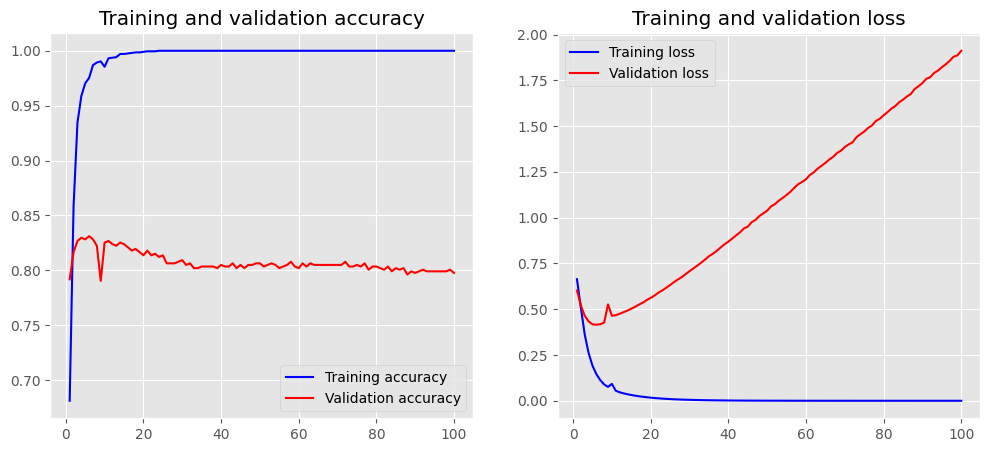

In [ ]:
plot_history(history)

**One of the conclusions** that can be drawn is that the model over-fits. The loss function of the validation set increases beyond a certain point. At this point it would be a good time to stop training.

# **WordEmbeddings**


---
Wordembeddings are vector representations of words that capture contextual and semantic information, making it easier for computers to process and understand natural language.




1.   Codification of the list of fruits in values in the following categories
2.   Use the OneHotEncoder provided by scikit-learn to encode the categorical values we have in an encoded numeric array.
3. Wordembeddings.



In [2]:
fruits = ['Apple', 'Pear', 'Melon', 'Orange', 'Cherries']
fruits

['Apple', 'Pear', 'Melon', 'Orange', 'Cherries']

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fruits_labels = encoder.fit_transform(fruits)
fruits_labels

array([0, 4, 2, 3, 1])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
fruits_labels = fruits_labels.reshape((5, 1))
encoder.fit_transform(fruits_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [8]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

Fantastic earphones.
[236, 1909]


**Keras tokenizer**, by default, sorts words by their frequency of occurrence, so that the most common words are assigned the lowest indices. These indices are then used to convert the text into sequences of numbers, which can be processed by machine learning models.

In [19]:
for word in ['the', 'day', 'happy', 'sad']:
    if word in tokenizer.word_index:
        print('{}: {}'.format(word, tokenizer.word_index[word]))
    else:
        print('La palabra "{}" no está en el vocabulario.'.format(word))


the: 1
day: 254
happy: 194
sad: 819


**In many machine learning models**, especially those based on neural networks, it is necessary for all inputs to be the same length. However, in natural text data, it is common for sentences or documents to vary in length.
pad_sequences is used to standardise sequence lengths. By doing this, all input sequences (in this case, X_train and X_test) will have the same length, which is a requirement for many models.

In [22]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[5, :])

[198 387   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [23]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           230150    
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 10)                50010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 280171 (1.07 MB)
Trainable params: 280171 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7962


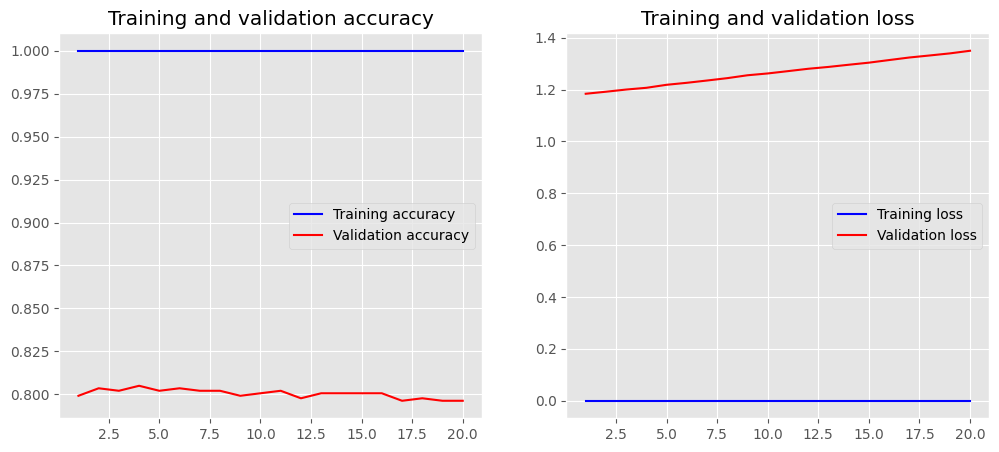

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


***Pooling layers*** are essential in sequence processing to reduce dimensionality, extract features and reduce the risk of overfitting.



In [29]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           230150    
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 230671 (901.06 KB)
Trainable params: 230671 (901.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
207/207 [==============================] - 13s 46ms/step - loss: 0.6734 - accuracy: 0.6240 - val_loss: 0.6219 - val_accuracy: 0.7686
Epoch 2/50
207/207 [==============================] - 2s 12ms/step - loss: 0.5010 - accuracy: 0.8661 - val_loss: 0.4435 - val_accuracy: 0.8282
Epoch 3/50
207/207 [==============================] - 2s 9ms/step - loss: 0.2813 - accuracy: 0.9306 - val_loss: 0.3740 - val_accuracy: 0.8413
Epoch 4/50
207/207 [==============================] - 1s 6ms/step - loss: 0.1492 - accuracy: 0.9607 - val_loss: 0.3640 - val_accuracy: 0.8384
Epoch 5/50
207/207 [==============================] - 3s 12ms/step - loss: 0.0781 - accuracy: 0.9816 - val_loss: 0.3715 - val_accuracy: 0.8428
Epoch 6/50
207/207 [==============================] - 2s 8ms/step - loss: 0.0415 - accuracy: 0.9942 - val_loss: 0.3897 - val_accuracy: 0.8428
Epoch 7/50
207/207 [==============================] - 2s 8ms/step - loss: 0.0230 - accuracy: 0.9981 - val_loss: 0.4022 - val_accuracy: 0.8384
Ep

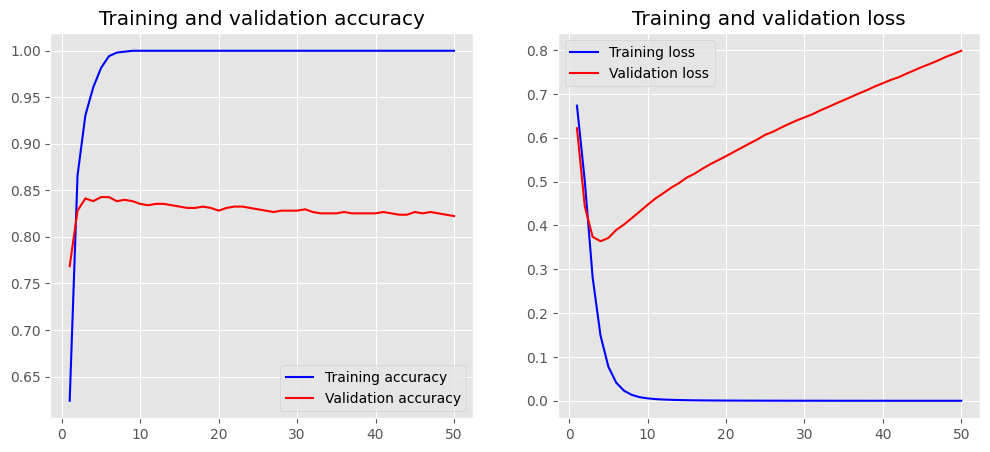

In [30]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [31]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [32]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    '/content/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [33]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8170758201173148

In [34]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           230150    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 230671 (901.06 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 230150 (899.02 KB)
_________________________________________________________________


Epoch 1/50
207/207 [==============================] - 2s 5ms/step - loss: 0.6855 - accuracy: 0.5716 - val_loss: 0.6658 - val_accuracy: 0.5852
Epoch 2/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.6172 - val_loss: 0.6407 - val_accuracy: 0.6361
Epoch 3/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6217 - accuracy: 0.6497 - val_loss: 0.6178 - val_accuracy: 0.6521
Epoch 4/50
207/207 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.6754 - val_loss: 0.6019 - val_accuracy: 0.6812
Epoch 5/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5887 - accuracy: 0.6856 - val_loss: 0.5953 - val_accuracy: 0.6812
Epoch 6/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5783 - accuracy: 0.7069 - val_loss: 0.5780 - val_accuracy: 0.7118
Epoch 7/50
207/207 [==============================] - 1s 4ms/step - loss: 0.5657 - accuracy: 0.7152 - val_loss: 0.5726 - val_accuracy: 0.7031
Epoch 

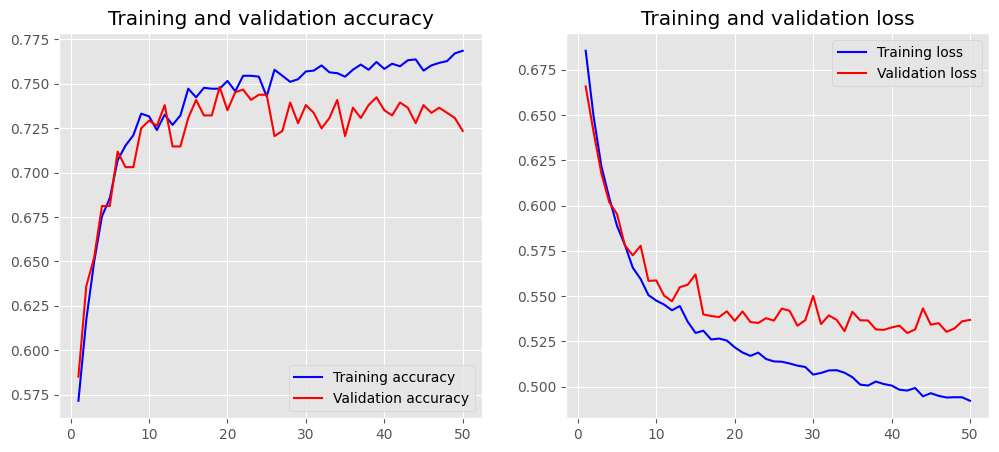

In [35]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [36]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           230150    
                                                                 
 global_max_pooling1d_2 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 230671 (901.06 KB)
Trainable params: 230671 (901.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8151


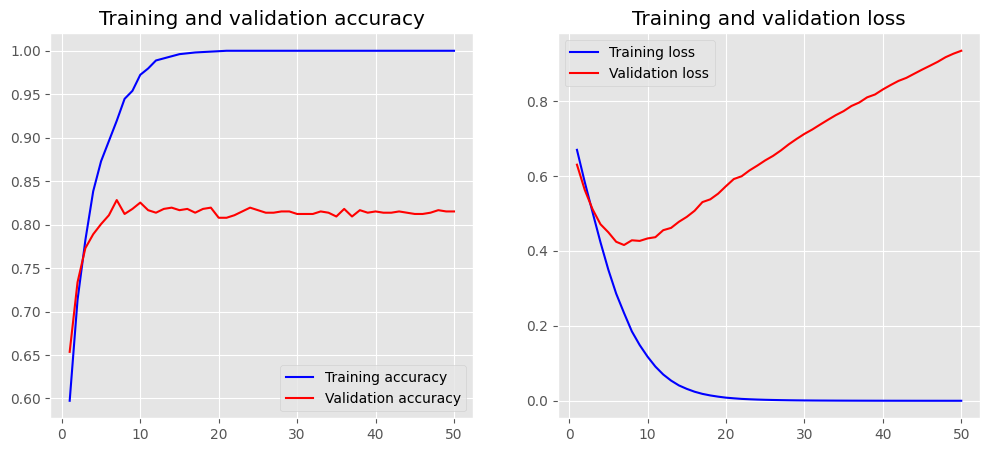

In [37]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [38]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          460300    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 525729 (2.01 MB)
Trainable params: 525729 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Epoch 1/10
207/207 [==============================] - 19s 74ms/step - loss: 0.6253 - accuracy: 0.6579 - val_loss: 0.4291 - val_accuracy: 0.8210
Epoch 2/10
207/207 [==============================] - 3s 14ms/step - loss: 0.2893 - accuracy: 0.8952 - val_loss: 0.3542 - val_accuracy: 0.8486
Epoch 3/10
207/207 [==============================] - 3s 13ms/step - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.4421 - val_accuracy: 0.8311
Epoch 4/10
207/207 [==============================] - 3s 16ms/step - loss: 0.0247 - accuracy: 0.9966 - val_loss: 0.4964 - val_accuracy: 0.8486
Epoch 5/10
207/207 [==============================] - 3s 13ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.5147 - val_accuracy: 0.8370
Epoch 6/10
207/207 [==============================] - 2s 9ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.5711 - val_accuracy: 0.8515
Epoch 7/10
207/207 [==============================] - 1s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6053 - val_accuracy: 0.8530


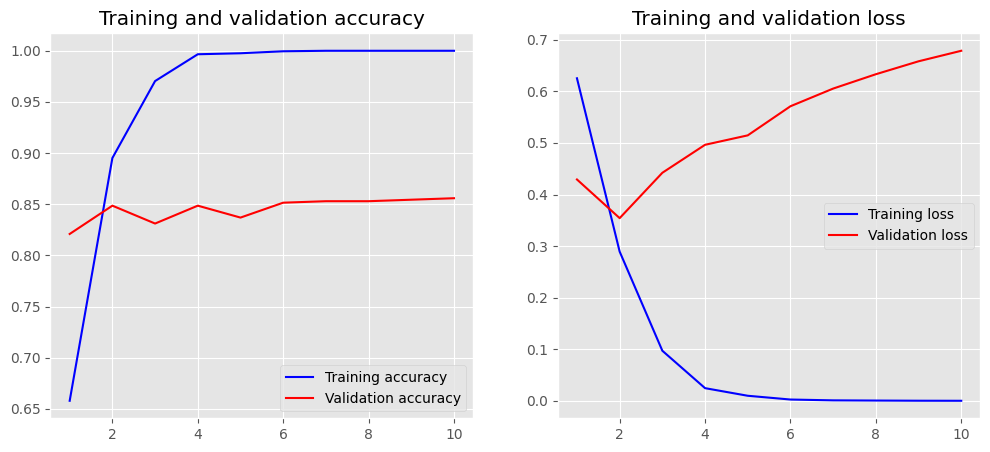

In [39]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# **Hyperparameters Optimization**

---
In addition to weights and biases, optimisation also involves the selection of hyperparameters such as learning rate, mini-batch size, and the choice of optimisation algorithm. These are not learned during training, but are set before the learning process.


In [60]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model